In [41]:
# Import libraries
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [42]:
# Read News and DJIA Data
df_news = pd.read_csv(os.path.join('..', 'data', 'RedditNews.csv'))
df_stock = pd.read_csv(os.path.join('..', 'data', 'upload_DJIA_table.csv'))

In [43]:
# Load the financial news dataset and do some basic transformations

df = pd.read_csv(os.path.join('..', 'data','articles.csv'))
df_links = pd.read_csv(os.path.join('..', 'data','links.csv'))
df = df.merge(df_links, left_on ='source_url', right_on= 'link')
# # Reduce the number of observations
# df.drop_duplicates(subset='text', inplace = True)
# # Draw random sample of 20%
# df = df.sample(frac=0.1, random_state = 42)
df['date'] = pd.to_datetime(df.date).dt.tz_localize("EST")
df['date_utc'] = df.date.dt.tz_convert("UTC")
df['year'] = df['date_utc'].dt.year
df['month'] = df['date_utc'].dt.month
df['release']= df['date'].dt.date
df.dropna(inplace = True)
df.rename(columns={'instrument':'ticker'}, inplace=True)
# df = df[df['year'] >= 2022]

C:\Users\duzzi\anaconda3\envs\MasterThesis\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [44]:
# Filter out news that are associated with more than one stock ticker
filtered_df = df.groupby('headline').filter(lambda x: len(x) == 1)

In [45]:
filtered_df

,date,headline,ticker,source_url,text,link,source,date_utc,year,month,release
10,2022-12-30 09:50:00-05:00,Global natural catastrophe 2022 insured losses seen at $112 billion-broker,SSREY,https://www.investing.com/news/stock-market-news/global-natural-catastrophe-insurance-losses-seen-at-112-billion-for-2022-2971326,"LONDON (Reuters) -Global insurance losses for natural catastrophes are projected to reach $112 billion in 2022, reinsurance broker Guy Carpenter said on Friday, driven by the impact of Hurricane Ian which hit Florida earlier this year. Flood and hail in Europe, Australian floods and severe storms in the United States also contributed to the total, Guy Carpenter said in a statement. Hurricane Ian and other natural catastrophes caused an estimated $115 billion of insured losses so far this year, well above the 10-year average of $81 billion, reinsurer Swiss Re (OTC: SSREY ) estimated earlier this month. Reinsurance rates are expected to rise sharply at the key Jan. 1 renewal date as a result of losses related to Hurricane Ian and the war in Ukraine, industry sources say. Ship insurers have excluded Ukraine, Russia and Belarus from war liability policies as reinsurers scale back their exposure. Discussions about rates and war exclusions have made negotiations between insurers and reinsurers tense this year, industry sources say. This year's renewal season was ""one of the most challenging. ..the sector has experienced"", Guy Carpenter said, adding that the process had been ""extremely late"". The projected losses do not include the impact of the most recent December natural catastrophes, Guy Carpenter added.",https://www.investing.com/news/stock-market-news/global-natural-catastrophe-insurance-losses-seen-at-112-billion-for-2022-2971326,By Reuters,2022-12-30 14:50:00+00:00,2022,12,2022-12-30
11,2022-12-30 04:10:00-05:00,U.S. lease sale off Alaska coast draws one bid,NG,https://www.investing.com/news/stock-market-news/us-holds-sale-of-drilling-rights-off-alaska-coast-2971416,"By Nichola Groom and Valerie Volcovici (Reuters) -The U.S. government on Friday received just a single bid, from Hilcorp Alaska, for oil and gas drilling rights off the coast of Alaska the first federal auction in the region in more than five years. The offer of nearly 1 million acres in the Cook Inlet was among the concessions to the oil and gas sector included in President Joe Biden's signature climate change law, the Inflation Reduction Act (IRA). Under the law, the Interior Department is required to hold the sale by Dec. 31. The agency had scrapped the Cook Inlet sale earlier this year before the IRA passed, citing a lack of industry interest. Hilcorp Alaska is a unit of Hilcorp Energy LP, the largest privately owned U.S. energy producer. The Texas based independent exploration and production (E and P) company invests in legacy assets. The Interior Department's Bureau of Ocean Energy Management (BOEM) announced that Hilcorp offered the only bid for a block offered on Friday for $63,983. BOEM oversees offshore energy development for the Interior Department. BOEM had offered 193 blocks covering about 958,202 acres (387,771 hecatres). Cook Inlet stretches 180 miles (290 km) from Anchorage to the Gulf of Alaska. Last week, five environmental groups sued the administration to block the sale, alleging it had not adequately considered the auction's impact on climate change as well as the consequences for threatened species such as the Cook Inlet beluga whale and humpback whales. ""This damaging sale never should have happened in the first place, and we’ll continue challenging it in court and fighting to preserve beautiful Cook Inlet,"" said Kristen Monsell, oceans legal director at the Center for Biological Diversity, said on Friday. The federal government has held several oil and gas lease sales in the Cook Inlet since the 1970s, but no production has occurred in federal waters there to date. There are 14 active federal leases in Cook Inlet, all of

In [47]:
display(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49150 entries, 10 to 1087836
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   date        49150 non-null  datetime64[ns, EST]
 1   headline    49150 non-null  object             
 2   ticker      49150 non-null  object             
 3   source_url  49150 non-null  object             
 4   text        49150 non-null  object             
 5   link        49150 non-null  object             
 6   source      49150 non-null  object             
 7   date_utc    49150 non-null  datetime64[ns, UTC]
 8   year        49150 non-null  int32              
 9   month       49150 non-null  int32              
 10  release     49150 non-null  object             
dtypes: datetime64[ns, EST](1), datetime64[ns, UTC](1), int32(2), object(7)
memory usage: 4.1+ MB


None

In [48]:
print('Number of unique articles: ' + str(len(filtered_df.text.unique())))

Number of unique articles: 48991


In [50]:
# get random article
import random
random.seed(5)

for i in random.sample(range(0, len(filtered_df)-1),5):
    print(filtered_df.text[i])
    print('___________________________________________________________________________________')

KeyError: 40822

In [51]:
# check by ticker
filtered_df.ticker.value_counts()

ticker
TSLA        1407
BA          1295
VOWG_p       994
AAPL         975
AMZN         878
            ... 
RVEN_...       1
HSON           1
NAOV           1
MNOV           1
EZA            1
Name: count, Length: 5938, dtype: int64

In [3]:
# check data
display(df_news.info())
display(df_stock.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


None

In [52]:
# set ticker of interest
tickerSymbol = "AAPL"

# filter df for ticker
df = filtered_df[filtered_df['ticker']==tickerSymbol]

In [53]:
df.drop_duplicates(subset='text', keep='first', inplace=True)

C:\Users\duzzi\AppData\Local\Temp\ipykernel_16220\2715218993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='text', keep='first', inplace=True)


In [54]:
# check by ticker
df.ticker.value_counts()

ticker
AAPL    975
Name: count, dtype: int64

In [55]:
# check by year
df.year.value_counts()

year
2022    277
2017    188
2018    158
2021    113
2020     84
2019     81
2016     43
2015     17
2014     14
Name: count, dtype: int64

In [56]:
df.to_csv(os.path.join('..', 'data','aapl_dfInput.csv'))

In [57]:
min(df['date'])

Timestamp('2014-03-06 04:45:00-0500', tz='EST')

In [58]:
# Adjust display settings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Get 5 random samples with reproducibility
df.sample(n=5, random_state=42)


,date,headline,ticker,source_url,text,link,source,date_utc,year,month,release
52228,2022-06-03 06:53:00-05:00,Apple: Weaker-than-expected May App Store Growth a Headwind to June Q Results - Morgan Stanley,AAPL,https://www.investing.com/news/stock-market-news/apple-weakerthanexpected-may-app-store-growth-a-headwind-to-june-q-results--morgan-stanley-432SI-2833214,"By Senad Karaahmetovic Morgan Stanley analyst Keith Weiss took note of the net revenue growth deceleration observed in Apple’s (NASDAQ: AAPL ) App Store for the month of May. The growth fell to +4% Y/Y in May on the back of the broad-based deceleration across all regions except the US. The App Store previously saw 8% Y/Y growth for April. For Weiss, App Store’s May results were “weaker than expected.” “One of the main drivers of May App Store weakness was China, which accounts for 26% of total T12M App Store spend. In May, App Store net revenue growth in China decelerated 8 points M/M to just +3% Y/Y, despite a 3 point easier Y/Y compare. We believe this implies April results (of +11% Y/Y) were likely aided by renewed COVID lockdowns in major metropolitan cities, and May's results reflect a moderation of demand as some areas slowly re-opened. New video game license approvals also likely aided April App Store results in China, with China gaming net revenue growth decelerating 8 points M/M in May, to +6% Y/Y,” Weiss wrote in a client note. By categories, only 2 categories saw the new revenue growth accelerate in May with Gaming - the largest sector - decelerating 5 points from April. All in all, the analyst sees downside risk to MS’ June quarter App Store forecast of +15% Y/Y. “While we believe Apple user spending is more resilient at all stages of the economic cycle, which positions Apple better than other consumer hardware peers, a deceleration in App Store growth likely points to fading consumer spending on goods/services that accelerated during the pandemic. While we are bullish on the longer-term App Store and Services outlook, a deceleration in App Store growth (and monetization) could be a near-term headwind to results,” Weiss added. Still, Weiss sees a path for App Store growth to return to more healthy numbers beyond the June quarter. “With the health of the consumer and the potential shifting nature of consumer spending patterns a key debate entering the summer months, an acceleration in App Store growth could help to dispel the bear concern of a more permanent App Store slowdown,” the analyst concluded.",https://www.investing.com/news/stock-market-news/apple-weakerthanexpected-may-app-store-growth-a-headwind-to-june-q-results--morgan-stanley-432SI-2833214,By Investing.com,2022-06-03 11:53:00+00:00,2022,6,2022-06-03
694775,2017-09-22 09:04:00-05:00,Piper Jaffray increases Apple price target and ASP forecast; iPhone 8 launches today,AAPL,https://www.investing.com/news/stock-market-news/piper-jaffray-increases-apple-price-target-and-asp-forecast-iphone-8-launches-today-531869,"Piper Jaffray raises its Apple (NASDAQ: AAPL ) price target by $6 to $196 and maintains an Overweight rating. Analyst Michael Olson predicts that the iPhone 8 and iPhone X will boost the company’s overall average selling point. Olson forecasts FY18 iPhone ASP of $710 compared to the $696 Street consensus. The ASP increase also adjusts Olson’s FY18 EPS estimate from $10.68 to $11.11, compared to $10.89 consensus. Olson writes, “We recommend owning Apple on potential for a strong overall iPhone cycle, rising ASPs and a favorable services revenue trajectory.” The iPhone 8 and 8 Plus hit retail stores today with the launches in Sydney, Australia, and Asia described as “bleak” and “muted”, respectively. Apple shares are down 0.47% premarket. Previously: Raymond James: Apple hasn't begun final production of iPhone X (Sept. 20) Now read: When Should You Buy Apple Again? Redux Original article",https://www.investing.com/news/stock-market-news/piper-jaffray-increases-apple-price-target-and-asp-forec

In [59]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import re
import html

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stop words
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the headlines
def preprocess_text(text, mode="simple"):
    # Convert the text to lower case
    #text = text.lower()
    
    # Remove html entities
    text = html.unescape(text)
    
    # Remove byte-string prefix and content
    text = re.sub(r"b'", "", text)
    text = re.sub(r'b"', "", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r"\\", "", text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove numeric values
    text = re.sub(r'\d+', '', text)
    
    if mode == "advanced":   
    
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)

        # Tokenize the text
        text = text.split()

        # Remove stop words and lemmatize the words
        text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
        
        # Join the words back into a single string
        text = ' '.join(text)
        
    else:
        
        # Join the words back into a single string
        text = ''.join(text)
    
    return text

# Apply the function to the headlines
df['News_Preprocessed'] = df['headline'].apply(preprocess_text)
df['News_Preprocessed_advanced'] = df['headline'].apply(preprocess_text, mode="advanced")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\duzzi\AppData\Local\Temp\ipykernel_16220\1078566149.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News_Preprocessed'] = df['headline'].apply(preprocess_text)
C:\Users\duzzi\AppData\Local\Temp\ipykernel_16220\1078566149.py:63: SettingWithCopyWarning: 
A value is tr

In [60]:
# Get 5 random samples with reproducibility
df.sample(n=5
               , random_state=42
              )

,date,headline,ticker,source_url,text,link,source,date_utc,year,month,release,News_Preprocessed,News_Preprocessed_advanced
52228,2022-06-03 06:53:00-05:00,Apple: Weaker-than-expected May App Store Growth a Headwind to June Q Results - Morgan Stanley,AAPL,https://www.investing.com/news/stock-market-news/apple-weakerthanexpected-may-app-store-growth-a-headwind-to-june-q-results--morgan-stanley-432SI-2833214,"By Senad Karaahmetovic Morgan Stanley analyst Keith Weiss took note of the net revenue growth deceleration observed in Apple’s (NASDAQ: AAPL ) App Store for the month of May. The growth fell to +4% Y/Y in May on the back of the broad-based deceleration across all regions except the US. The App Store previously saw 8% Y/Y growth for April. For Weiss, App Store’s May results were “weaker than expected.” “One of the main drivers of May App Store weakness was China, which accounts for 26% of total T12M App Store spend. In May, App Store net revenue growth in China decelerated 8 points M/M to just +3% Y/Y, despite a 3 point easier Y/Y compare. We believe this implies April results (of +11% Y/Y) were likely aided by renewed COVID lockdowns in major metropolitan cities, and May's results reflect a moderation of demand as some areas slowly re-opened. New video game license approvals also likely aided April App Store results in China, with China gaming net revenue growth decelerating 8 points M/M in May, to +6% Y/Y,” Weiss wrote in a client note. By categories, only 2 categories saw the new revenue growth accelerate in May with Gaming - the largest sector - decelerating 5 points from April. All in all, the analyst sees downside risk to MS’ June quarter App Store forecast of +15% Y/Y. “While we believe Apple user spending is more resilient at all stages of the economic cycle, which positions Apple better than other consumer hardware peers, a deceleration in App Store growth likely points to fading consumer spending on goods/services that accelerated during the pandemic. While we are bullish on the longer-term App Store and Services outlook, a deceleration in App Store growth (and monetization) could be a near-term headwind to results,” Weiss added. Still, Weiss sees a path for App Store growth to return to more healthy numbers beyond the June quarter. “With the health of the consumer and the potential shifting nature of consumer spending patterns a key debate entering the summer months, an acceleration in App Store growth could help to dispel the bear concern of a more permanent App Store slowdown,” the analyst concluded.",https://www.investing.com/news/stock-market-news/apple-weakerthanexpected-may-app-store-growth-a-headwind-to-june-q-results--morgan-stanley-432SI-2833214,By Investing.com,2022-06-03 11:53:00+00:00,2022,6,2022-06-03,Apple: Weaker-than-expected May App Store Growth a Headwind to June Q Results - Morgan Stanley,Apple Weakerthanexpected May App Store Growth Headwind June Q Results Morgan Stanley
694775,2017-09-22 09:04:00-05:00,Piper Jaffray increases Apple price target and ASP forecast; iPhone 8 launches today,AAPL,https://www.investing.com/news/stock-market-news/piper-jaffray-increases-apple-price-target-and-asp-forecast-iphone-8-launches-today-531869,"Piper Jaffray raises its Apple (NASDAQ: AAPL ) price target by $6 to $196 and maintains an Overweight rating. Analyst Michael Olson predicts that the iPhone 8 and iPhone X will boost the company’s overall average selling point. Olson forecasts FY18 iPhone ASP of $710 compared to the $696 Street consensus. The ASP increase also adjusts Olson’s FY18 EPS estimate from $10.68 to $11.11, compared to $10.89 consensus. Olson writes, “We recommend owning Apple on potential for a strong overall iPhone cycle, rising ASPs and a favorable services revenue trajectory.” The iPhone 8 and 8 Plus hit retail stores today with the launches in Sydney, Australia, and Asia described as “bleak” and “muted”, respectively. Apple shares are down 0.47% premarket. Previously: Raymond James: Apple 

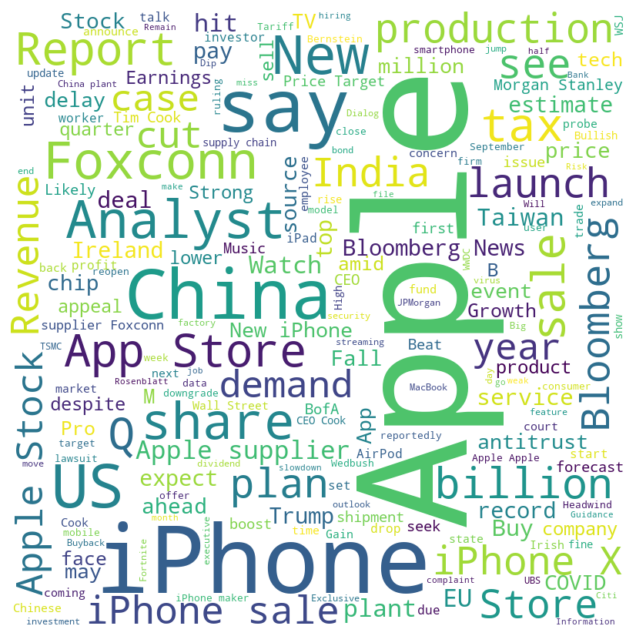

In [61]:
from wordcloud import WordCloud

combined_text = ' '.join(df['News_Preprocessed_advanced'].tolist())

# Create the word cloud object
wc = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
import yfinance as yf

def fetch_apple_data():
    # Define the ticker symbol
    ticker_symbol = "AAPL"
    
    # Get the data
    ticker_data = yf.Ticker(ticker_symbol)
    
    # Fetch historical data (today's data)
    stock_data = ticker_data.history(start= min(df['release']),
                                    end= max(df['release']))
    
    return stock_data

df_stock = fetch_apple_data()

In [63]:
df_stock.sort_values(by='Date',inplace=True)

In [64]:
# Get 5 random samples with reproducibility
df_stock.sample(n=5
               , random_state=42
              )

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-07-23 00:00:00-04:00,21.184048,21.730188,21.128545,21.577003,371672000,0.0,0.0
2022-12-09 00:00:00-05:00,141.735289,144.951578,140.301404,141.556061,76097000,0.0,0.0
2021-11-18 00:00:00-05:00,152.173808,157.084229,151.520401,156.292221,137827700,0.0,0.0
2021-08-13 00:00:00-04:00,147.266242,147.730868,146.574251,147.394760,59375000,0.0,0.0
2021-05-04 00:00:00-04:00,129.275993,129.571619,124.851495,125.984718,137564700,0.0,0.0


In [65]:
# Convert prices to returns
df_stock.sort_values(by='Date',inplace=True)
df_stock['returns'] = df_stock['Close'].pct_change()

# Drop the first row, which will have a missing return
df_stock = df_stock.dropna()

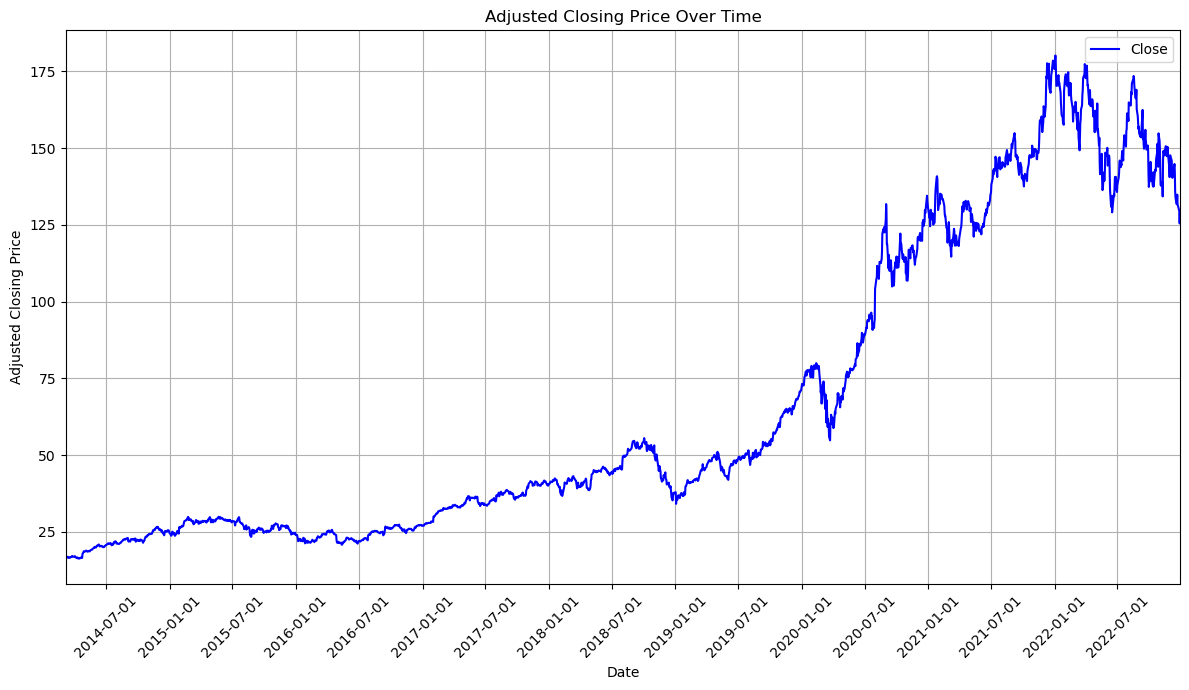

In [66]:
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

# Custom function to format y-axis tick labels with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Ensuring 'Date' column is of type datetime64
df_stock['Date'] = pd.to_datetime(df_stock.index)

# Setting the x-axis limits to match the date range of the data
start_date = pd.to_datetime(df_stock['Date'].min())
end_date = pd.to_datetime(df_stock['Date'].max())

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(df_stock['Date'], df_stock['Close'], color='b', label='Close')
plt.title('Adjusted Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')

# Setting the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 7], bymonthday=1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Setting the formatter for the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Explicitly setting the x-axis limits
ax.set_xlim(start_date, end_date)

# Rotate the date labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

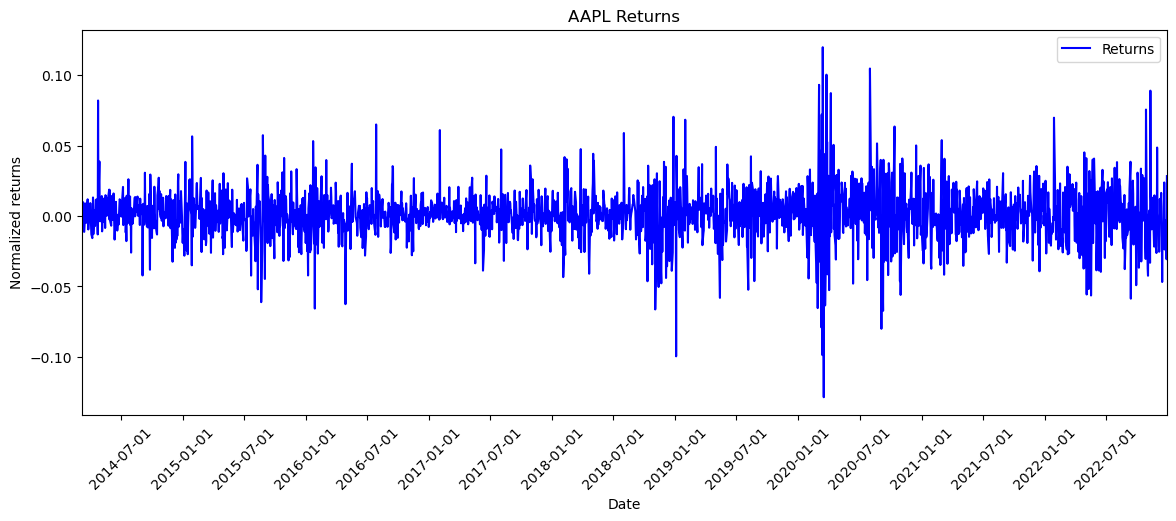

In [67]:
# Plot the actual and predicted returns
plt.figure(figsize=(14, 5))
plt.plot(df_stock['Date'],df_stock['returns'], color='blue', label='Returns')

# Setting the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 7], bymonthday=1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Explicitly setting the x-axis limits
ax.set_xlim(start_date, end_date)

# Rotate the date labels for better visibility
plt.xticks(rotation=45)

plt.title('AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Normalized returns')
plt.legend()
plt.show()


In [68]:
df.to_csv(os.path.join('..', 'data', 'APPLE_NEWS_preprocessed.csv'), index=False)
df_stock.to_csv(os.path.join('..', 'data', 'APPLE_STOCK_preprocessed.csv'), index=False)